## Airline Delay Cause

Описание:
Бюро транспортной статистики Министерства транспорта США отслеживает своевременность выполнения внутренних рейсов, выполняемых крупными авиаперевозчиками. Сводная информация о количестве своевременных, задержанных, отмененных и перенаправленных рейсов содержится в ежемесячном отчете для потребителей авиаперевозок. Данные представлены за период с января 2023 по декабрь 2023

* `year` - Формат ГГГГ
* `month` - Формат MM (1–12)
* `carrie` - Код, присвоенный US DOT для идентификации уникальной авиакомпании
* `carrier_name` - Уникальная авиакомпания (перевозчик) определяется как владеющая и осуществляющая отчетность по одному и тому же сертификату DOT, независимо от ее кода, названия или холдинговой компании/корпорации.
* `airpor` - Трехзначный буквенно-цифровой код, выданный Министерством транспорта США, являющийся официальным обозначением аэропорта
* `airport_name` - место, откуда выполняются полеты, обычно имеющее асфальтированные взлетно-посадочные полосы и средства технического обслуживания и часто служащее терминалом
* `arr_flight` - Прибывающие рейсы
* `arr_del15` - Индикатор прибытия с задержкой 15 минут или более Время задержки прибытия равно разности между фактическим временем прибытия и запланированным временем прибытия. Рейс считается прибывшим вовремя, если он прибывает менее чем через 15 минут после опубликованного времени прибытия.
* `carrier_c` - Количество перевозчиков, указавших задержку по причине авиакомпании
* `weather_ct` - Количество погодных условий, указанных в качестве причины задержки авиакомпании
* `nas_c` - Количество случаев, когда причиной задержки авиакомпании указана NAS (Национальная авиационная система)
* `security_ct` - Количество случаев, когда причиной задержки авиакомпании указана служба безопасности
* `late_aircraft_c` - Количество задержек рейса из-за опоздания самолета, указанных в качестве причины задержки авиакомпании
* `arr_cancelled` - отмененные рейсы
* `arr_diverte` - перенаправленные рейсы
* `arr_delay` - Разница (в минутах) между запланированным и фактическим временем прибытия. Ранние прибытия отображаются отрицательными числами.
* `carrier_dela` - Задержка по причине перевозчика (в минутах)
* `weather_delay` - Задержка по причине погоды (в минутах)
* `nas_dela` - Задержка в Национальной авиационной системе (в минутах)
* `security_delay` - Задержка по причине службы безопасности (в минутах)
* `late_aircraft_dela` - Задержка рейса из-за опоздания самолета (в минутах)

Проверим следующие гипотезы:
* Большие авиакомпании имеют более высокий процент задержанных рейсов.
* Задержки, вызванные погодными условиями, преобладают в определенные месяцы года.
* Аэропорты с большим количеством рейсов имеют больший процент задержанных рейсов. 
* Главная причина задержек это опоздание самолета

Ход работы:
* Обзор данный 
* Предобработка данных 
* Проверка гипотез 

In [691]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,mannwhitneyu

import warnings
warnings.filterwarnings(action='ignore')

In [692]:
df = pd.read_csv('Airline_Delay_Cause.csv')
df.shape

(22621, 21)

In [693]:
pd.set_option('display.max_columns', None)
df.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
19960,2023,2,OO,SkyWest Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",117.0,15.0,8.00,6.00,0.00,1.0,0.00,3.0,1.0,1017.0,416.0,510.0,0.0,91.0,0.0
2459,2023,11,DL,Delta Air Lines Network,TRI,"Bristol/Johnson City/Kingsport, TN: Tri Cities",30.0,2.0,1.59,0.00,0.41,0.0,0.00,0.0,0.0,157.0,144.0,0.0,13.0,0.0,0.0
21502,2023,1,G7,GoJet Airlines LLC d/b/a United Express,CLT,"Charlotte, NC: Charlotte Douglas International",6.0,1.0,0.00,0.00,1.00,0.0,0.00,0.0,0.0,21.0,0.0,0.0,21.0,0.0,0.0
5650,2023,9,9E,Endeavor Air Inc.,EVV,"Evansville, IN: Evansville Regional",9.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15167,2023,4,AA,American Airlines Network,GEG,"Spokane, WA: Spokane International",60.0,14.0,6.95,1.08,1.21,0.0,4.75,1.0,0.0,858.0,376.0,84.0,26.0,0.0,372.0


In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22621 entries, 0 to 22620
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 22621 non-null  int64  
 1   month                22621 non-null  int64  
 2   carrier              22621 non-null  object 
 3   carrier_name         22621 non-null  object 
 4   airport              22621 non-null  object 
 5   airport_name         22621 non-null  object 
 6   arr_flights          22574 non-null  float64
 7   arr_del15            22569 non-null  float64
 8   carrier_ct           22574 non-null  float64
 9   weather_ct           22574 non-null  float64
 10  nas_ct               22574 non-null  float64
 11  security_ct          22574 non-null  float64
 12  late_aircraft_ct     22574 non-null  float64
 13  arr_cancelled        22574 non-null  float64
 14  arr_diverted         22574 non-null  float64
 15  arr_delay            22574 non-null 

In [695]:
df.isna().sum()

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            47
arr_del15              52
carrier_ct             47
weather_ct             47
nas_ct                 47
security_ct            47
late_aircraft_ct       47
arr_cancelled          47
arr_diverted           47
arr_delay              47
carrier_delay          47
weather_delay          47
nas_delay              47
security_delay         47
late_aircraft_delay    47
dtype: int64

Так как пустых строк мало по сравнению с общим количеством данных, просто удалим их

In [696]:
df = df.dropna()
df.isna().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [697]:
df.duplicated().sum()

0

### Большие авиакомпании имеют более высокий процент задержанных рейсов

Отберем топ 10 авиакомпаний с самым большим количеством рейсов

In [698]:
df_largest_carrier = df.groupby('carrier').sum().reset_index().loc[:,['carrier','arr_flights']].sort_values('arr_flights',ascending=False)
df_largest_carrier = df_largest_carrier.rename(columns={'arr_flights':'carrier_flights'})
df_largest_carrier.head(10)

,carrier,carrier_flights
17,WN,1438465.0
5,DL,984986.0
1,AA,940531.0
16,UA,732212.0
13,OO,675285.0
19,YX,295651.0
3,B6,274852.0
11,NK,263871.0
2,AS,245344.0
10,MQ,227505.0


In [699]:
list(df_largest_carrier['carrier'].head(10))

['WN', 'DL', 'AA', 'UA', 'OO', 'YX', 'B6', 'NK', 'AS', 'MQ']

In [700]:
def is_big(x):
    if x in ['WN', 'DL', 'AA', 'UA', 'OO', 'YX', 'B6', 'NK', 'AS', 'MQ']:
        x=True
    else:
        x=False
    return x

In [701]:
df_copy1 = df.copy()
df_copy1['is_big_carrie'] =df_copy1['carrier'].apply(is_big)
df_copy1['percentage_delay'] = df_copy1['arr_del15']/df_copy1['arr_flights']*100
df_by_carrier = df_copy1.groupby('carrier').agg('mean').reset_index()
df_by_carrier=df_by_carrier.merge(df_largest_carrier, on='carrier').loc[:,['carrier','percentage_delay','carrier_flights']]
df_by_carrier = df_by_carrier.sort_values('carrier_flights')

Посмотрим на процент задержек в зависимости от аэрокомпании. Слева направо от наименьшей к наибольшей компании по количеству рейсов

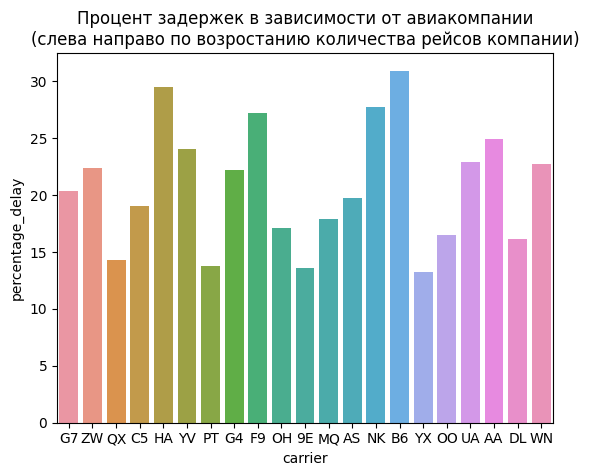

In [702]:
fig,ax=plt.subplots()
sns.barplot(df_by_carrier, x = 'carrier', y = 'percentage_delay')
ax.set_title('Процент задержек в зависимости от авиакомпании\n(слева направо по возростанию количества рейсов компании)')
plt.show()

Визуально разница в процентном отношении задержек между большими компаниями и маленькими незаметна. 

Разобьем авиакомпании на две группы и сравним средний процент задержек.

In [703]:
df_by_is_big_carrier = df_copy1.groupby('is_big_carrie').agg('mean')['percentage_delay'].reset_index()

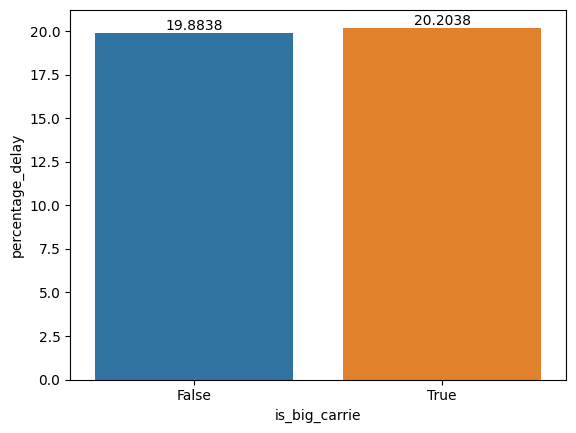

In [704]:
ax = sns.barplot(df_by_is_big_carrier,x = 'is_big_carrie', y = 'percentage_delay')
ax.bar_label(ax.containers[0])
plt.show()

Разница небольшая. В данном случае имеет смысл провести статистический тест. Посмотрим на распределение данных 

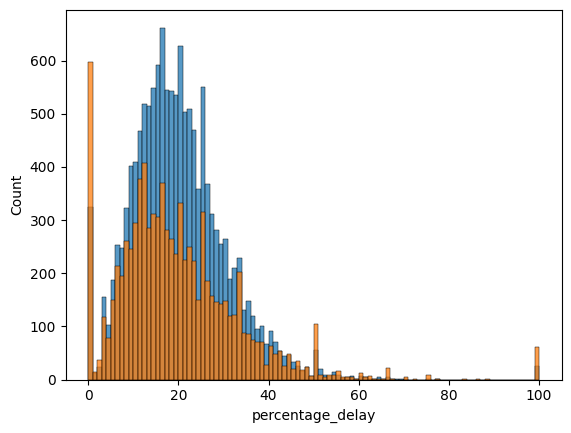

In [705]:
sns.histplot(df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'],bins=100)
sns.histplot(df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'],bins=100)
plt.show()

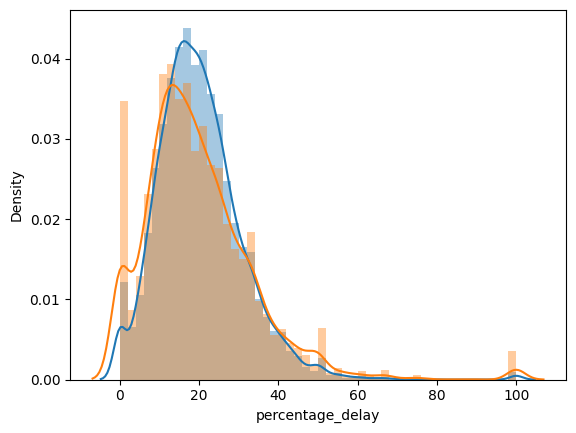

In [706]:
sns.distplot(df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'])
sns.distplot(df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'])
plt.show()

Распределение похоже на нормальное, но столбец со значением 0 является довольно высоким, это может помешать при проведении t-теста.  

### Основная и альтернативная гипотеза:
* H_0: Средний процент процент задержек у больших и маленьких авиакомпаний одинаковый
* H_1: У больших авиакомпаний процент задержек больше чем у маленьких 

In [707]:
alpha=0.05
t, p = ttest_ind(df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'], df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'])
print("t-статистика:", t)
print("p-значение:", p/2)

if (p/2 < alpha) and (df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'].mean() > df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t-статистика: 1.9234450746196325
p-значение: 0.027218371969193834
Отвергаем нулевую гипотезу


t - статистика < 2 поэтому разница между группами не большая 

Стоит ли доверять данному результату, если учитывать ненормальность распределения ?

Проведем тест Манна Уитни

In [708]:
alpha=0.05
u, p = mannwhitneyu(df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'], df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'])
print("t-статистика:", u)
print("p-значение:", p/2)

if (p/2 < alpha) and (df_copy1[df_copy1['is_big_carrie']==True]['percentage_delay'].mean() > df_copy1[df_copy1['is_big_carrie']==False]['percentage_delay'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t-статистика: 64530147.5
p-значение: 1.3387175190862902e-16
Отвергаем нулевую гипотезу


Тест Манна Уитни также отвергает нулевую гипотезу 

## Задержки, вызванные погодными условиями, преобладают в определенные месяцы года

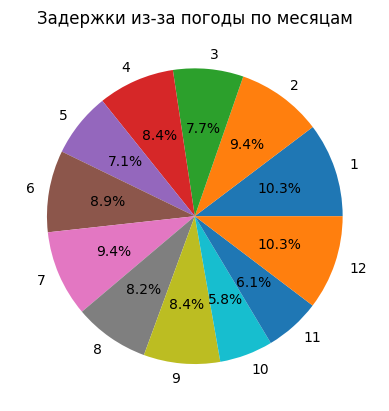

In [709]:
df_by_month = df_copy1.groupby('month').agg('mean').loc[:,['arr_delay','weather_delay']].reset_index()
fig, ax = plt.subplots()
plt.pie(df_by_month['weather_delay']/df_by_month['arr_delay'], labels = df_by_month['month'],autopct='%1.1f%%')
ax.set_title('Задержки из-за погоды по месяцам')
plt.show()

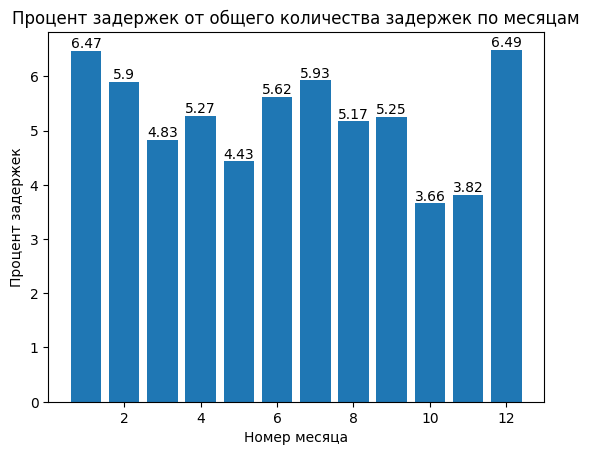

In [710]:
fig, ax = plt.subplots()
plt.bar(df_by_month['month'], round(df_by_month['weather_delay']/df_by_month['arr_delay']*100,2))
ax.set(xlabel="Номер месяца", ylabel="Процент задержек")
ax.set_title('Процент задержек от общего количества задержек по месяцам')
ax.bar_label(ax.containers[0])
plt.show()

In [711]:
def get_seson(x):
    if x in [12,1,2]:
        x='winter'
    elif 3<=x<=5:
        x='spring'
    elif 6<=x<=8:
        x='summer'
    else:
        x='fall'
    return x

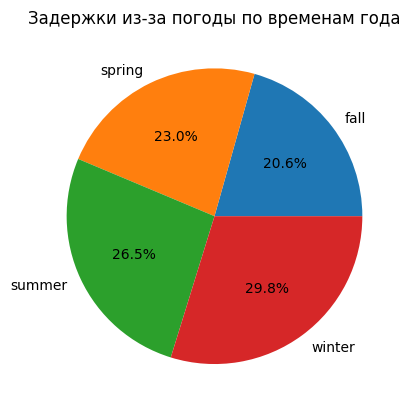

In [712]:
df_copy1['seson']=df['month'].apply(get_seson)
df_by_seson = df_copy1.groupby('seson').agg('mean').loc[:,['arr_delay','weather_delay']].reset_index()
fig,ax=plt.subplots()
plt.pie(df_by_seson['weather_delay']/df_by_seson['arr_delay'], labels = df_by_seson['seson'],autopct='%1.1f%%')
ax.set_title('Задержки из-за погоды по временам года')
plt.show()

Да, задержки преобладают в определенные месяца:декабрь, январь, февраль,июль. Если рассматривать времена года, то больше всего задержек происходит зимой

## Аэропорты с большим количеством рейсов имеют больший процент задержанных рейсов   

In [713]:
df_by_airport = df.groupby('airport').agg('sum')['arr_flights'].reset_index().sort_values(by = 'arr_flights',ascending=False)
df_by_airport.head(5)

,airport,arr_flights
22,ATL,336902.0
92,DEN,299430.0
243,ORD,295107.0
93,DFW,290351.0
71,CLT,225122.0


Поделим аэропорты на две группы

[Text(0, 0, '18.7015'), Text(0, 0, '21.7783')]

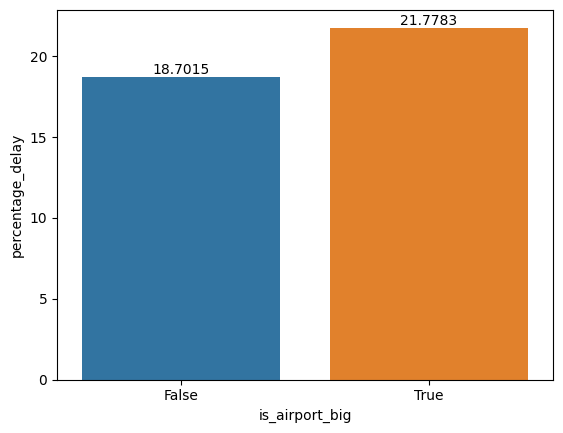

In [714]:
mean_flights = df_by_airport['arr_flights'].mean()
df_by_airport['is_airport_big']=df_by_airport['arr_flights'].apply([lambda x: True if x>mean_flights else False])

df_copy1 = df_copy1.merge(df_by_airport.loc[:,['airport','is_airport_big']],on='airport')
df_copy1.groupby('is_airport_big').agg('mean')['percentage_delay'].reset_index()

fig,ax=plt.subplots()
sns.barplot(df_copy1.groupby('is_airport_big').agg('mean')['percentage_delay'].reset_index(), x='is_airport_big', y='percentage_delay')
ax.bar_label(ax.containers[0])

Да, в больших аэропортах процент задержек больше. Убедимся в в этом с помощью статистических методов

<Axes: xlabel='percentage_delay', ylabel='Density'>

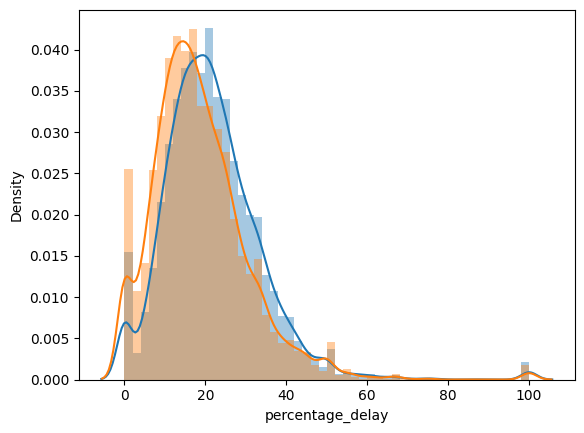

In [715]:
sns.distplot(df_copy1[df_copy1['is_airport_big']==True]['percentage_delay'])
sns.distplot(df_copy1[df_copy1['is_airport_big']==False]['percentage_delay'])

<Axes: xlabel='percentage_delay', ylabel='Count'>

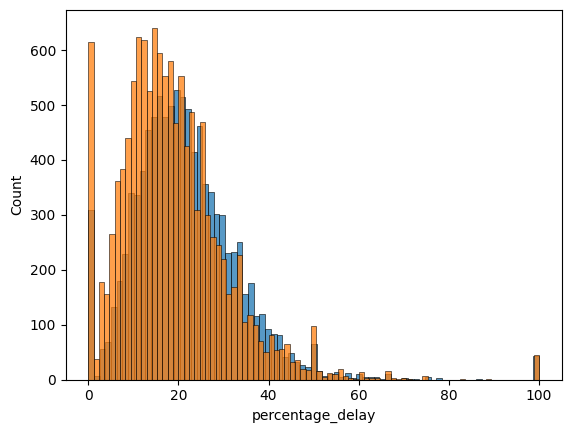

In [716]:
sns.histplot(df_copy1[df_copy1['is_airport_big']==True]['percentage_delay'])
sns.histplot(df_copy1[df_copy1['is_airport_big']==False]['percentage_delay'])

### Основная и альтернативная гипотеза:
* H_0: Средний процент процент задержек у больших и маленьких аэропортов одинаковый
* H_1: У больших аэропортов процент задержек больше чем у маленьких 

In [717]:
alpha=0.05
t, p = ttest_ind(df_copy1[df_copy1['is_airport_big']==True]['percentage_delay'], df_copy1[df_copy1['is_airport_big']==False]['percentage_delay'])
print("t-статистика:", t)
print("p-значение:", p/2)

if (p/2 < alpha) and (df_copy1[df_copy1['is_airport_big']==True]['percentage_delay'].mean() > df_copy1[df_copy1['is_airport_big']==False]['percentage_delay'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

t-статистика: 19.001033484266156
p-значение: 3.517393316819999e-80
Отвергаем нулевую гипотезу


## Главная причина задержек это опоздание самолета

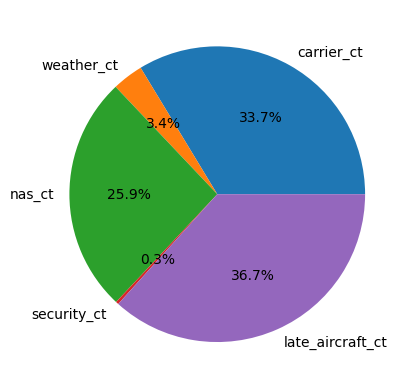

In [734]:
df_sum_ct = df.loc[:,['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum().reset_index()
plt.pie(df_sum_ct.loc[:,0],labels = df_sum_ct.loc[:,'index'],autopct='%1.1f%%')
plt.show()